In [19]:
import pandas as pd
import pytwoway as tw
import bipartitepandas as bpd

In [20]:
dat = pd.read_csv('C:/Users/Public/Documents/Wages and FTC/Data/data_akm_python_1014_joint.csv')

In [21]:
measures = bpd.measures.Moments(measures = 'mean')
grouping = bpd.grouping.Quantiles(n_quantiles = 4)
cluster_params = bpd.cluster_params(
    {
        'measures': measures,
        'grouping': grouping
    }
)

clean_params = bpd.clean_params(
    {
        'connectedness': 'leave_out_spell',
        'collapse_at_connectedness_measure': True,
        'drop_single_stayers': True,
        'drop_returns': 'returners',
        'copy': False
    }
)

In [22]:
tmp = dat[dat['cdi'] == True]

bdf = bpd.BipartiteDataFrame(
    i = tmp['ident_all'], j = tmp['siren'], y = tmp['l_hwr_agg_w2'], t = tmp['year'], 
)

bdf = bdf.clean(clean_params)
bdf = bdf.cluster(cluster_params)
bdf = bdf.to_extendedeventstudy(transition_col = 'j', periods_pre = 2, periods_post = 2)

bdf.to_csv('C:/Users/Public/Documents/Wages and FTC/Data/CHK_diag_cdi.csv')


checking required columns and datatypes
sorting rows
dropping NaN observations
generating 'm' column
keeping highest paying job for i-t (worker-year) duplicates (how='max')
dropping workers who leave a firm then return to it (how='returners')
making 'i' ids contiguous
making 'j' ids contiguous
computing largest connected set (how=None)
sorting columns
resetting index
checking required columns and datatypes
sorting rows
generating 'm' column
computing largest connected set (how='leave_out_observation')
making 'i' ids contiguous
making 'j' ids contiguous
sorting columns
resetting index


c:\ProgramData\Miniconda3\envs\SALMATL\lib\site-packages\bipartitepandas\bipartitebase.py:1493: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  frame.loc[:, g_col] = frame.loc[:, g_col].astype('Int64', copy=False)


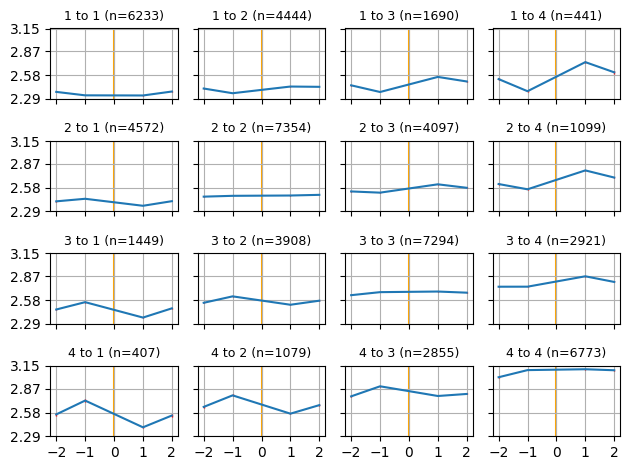

In [23]:
tw.diagnostics.plot_extendedeventstudy(bdf, periods_pre = 2, periods_post = 2, params = {'title_height': 1,
'fontsize': 9, 'sharex': True, 'sharey': True, 'yticks_round': 2})

In [24]:
tmp = dat[dat['cdi'] == False]

bdf = bpd.BipartiteDataFrame(
    i = tmp['ident_all'], j = tmp['siren'], y = tmp['l_hwr_agg_w2'], t = tmp['year'], 
)

bdf = bdf.clean(clean_params)
bdf = bdf.cluster(cluster_params)
bdf = bdf.to_extendedeventstudy(transition_col = 'j', periods_pre = 2, periods_post = 2)

bdf.to_csv('C:/Users/Public/Documents/Wages and FTC/Data/CHK_diag_cdd.csv')

checking required columns and datatypes
sorting rows
dropping NaN observations
generating 'm' column
keeping highest paying job for i-t (worker-year) duplicates (how='max')
dropping workers who leave a firm then return to it (how='returners')
making 'i' ids contiguous
making 'j' ids contiguous
computing largest connected set (how=None)
sorting columns
resetting index
checking required columns and datatypes
sorting rows
generating 'm' column
computing largest connected set (how='leave_out_observation')
making 'i' ids contiguous
making 'j' ids contiguous
sorting columns
resetting index


c:\ProgramData\Miniconda3\envs\SALMATL\lib\site-packages\bipartitepandas\bipartitebase.py:1493: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  frame.loc[:, g_col] = frame.loc[:, g_col].astype('Int64', copy=False)


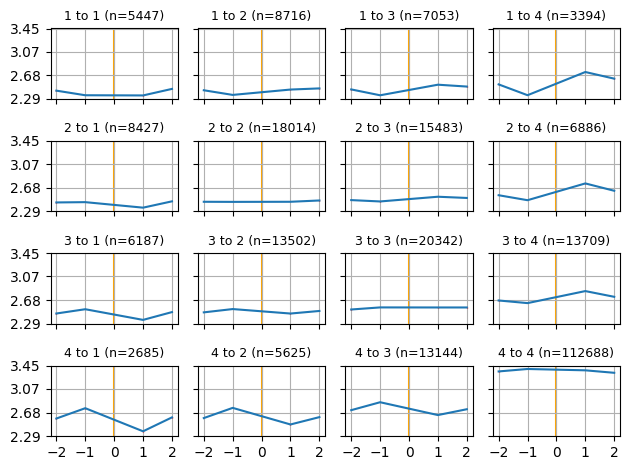

In [25]:
tw.diagnostics.plot_extendedeventstudy(bdf, periods_pre = 2, periods_post = 2, params = {'title_height': 1,
'fontsize': 9, 'sharex': True, 'sharey': True, 'yticks_round': 2})